<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase02/Notebooks/c_SintonizacionHiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Clase 02 - Árboles de decisión__

En este ejercicio, aprenderemos a entrenar árboles de decisión usando ``sklearn`` y sintonizaremos sus hiperparámetros utilizando diferentes estrategias.

Thanks to Misra Turp for the base of the notebook:

https://github.com/misraturp/Decision-Tree-Implementation/blob/main/Decision%20Trees%20with%20Scikitlearn.ipynb



In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.01)
model = model.fit(X_train, y_train)

In [ ]:
model.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

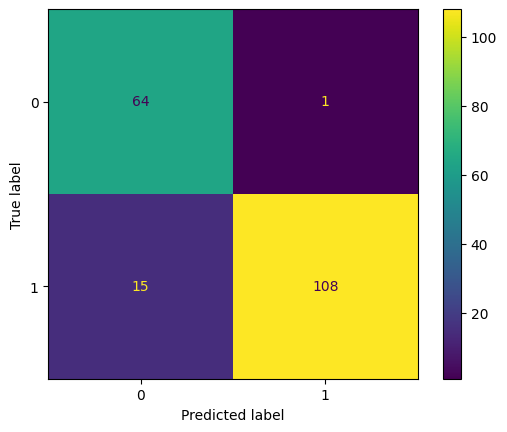

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.81      0.98      0.89        65
      benign       0.99      0.88      0.93       123

    accuracy                           0.91       188
   macro avg       0.90      0.93      0.91       188
weighted avg       0.93      0.91      0.92       188



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3],
}

# Create a decision tree classifier object
model = DecisionTreeClassifier()

# Create the GridSearchCV object
best_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
best_model.fit(X_train, y_train)

# Get the best parameters
best_params = best_model.best_params_

print('Best parameters found: ', best_params)

# Evaluate the model with best parameters on the test set
predictions_best_model = best_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


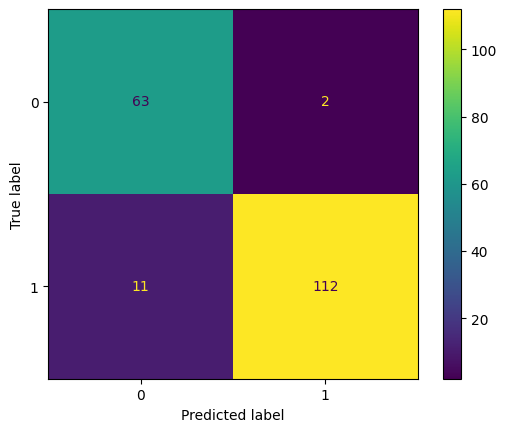

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_model, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.85      0.97      0.91        65
      benign       0.98      0.91      0.95       123

    accuracy                           0.93       188
   macro avg       0.92      0.94      0.93       188
weighted avg       0.94      0.93      0.93       188



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the hyperparameter distribution
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None] + list(np.arange(2, 50)),
    "min_samples_split": list(np.arange(2, 50)),
    "min_samples_leaf": list(np.arange(1, 50)),
}

# Create a decision tree classifier object
model = DecisionTreeClassifier()

# Create the RandomizedSearchCV object
best_model = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
best_model.fit(X_train, y_train)

# Get the best parameters
best_params = best_model.best_params_

print('Best parameters found: ', best_params)

# Evaluate the model with best parameters on the test set
predictions_best_model = best_model.predict(X_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'min_samples_split': 30, 'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'entropy'}


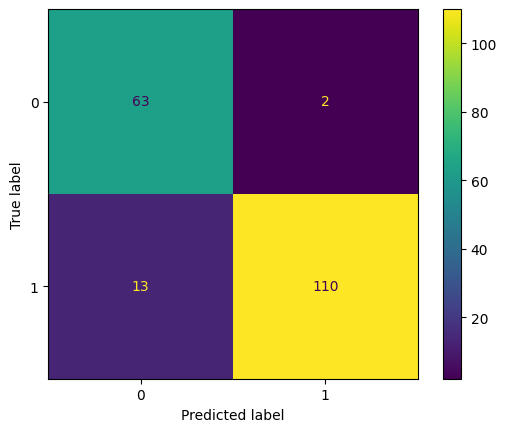

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_model, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.83      0.97      0.89        65
      benign       0.98      0.89      0.94       123

    accuracy                           0.92       188
   macro avg       0.91      0.93      0.91       188
weighted avg       0.93      0.92      0.92       188



In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
# Define the objective function to be optimized
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)

    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
    )

    return cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()

# Create a new study to optimize the classifier's hyperparameters
study = optuna.create_study(direction="maximize")

# Perform the optimization
study.optimize(objective, n_trials=100)

# Print the result
best_params = study.best_trial.params
print('Best parameters found: ', best_params)

# Evaluate the model with best parameters on the test set
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)
predictions_best_model = best_model.predict(X_test)

[I 2023-08-05 01:59:28,266] A new study created in memory with name: no-name-965a1995-228c-4f10-8212-517cd72f9df5
[I 2023-08-05 01:59:28,416] Trial 0 finished with value: 0.9318181818181819 and parameters: {'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 40, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9318181818181819.
[I 2023-08-05 01:59:28,527] Trial 1 finished with value: 0.8897812713602187 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 31}. Best is trial 0 with value: 0.9318181818181819.
[I 2023-08-05 01:59:28,593] Trial 2 finished with value: 0.9266233766233766 and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 34, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.9318181818181819.
[I 2023-08-05 01:59:28,657] Trial 3 finished with value: 0.9003075871496924 and parameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 38, 'min_samples_leaf': 28}. Best is tria

Best parameters found:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 9}


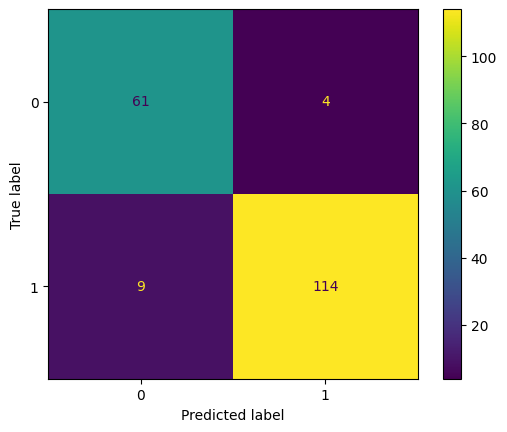

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions_best_model, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.87      0.94      0.90        65
      benign       0.97      0.93      0.95       123

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188

